In [4]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import pandas as pd


In [5]:
dfX = pd.read_csv('digitsX.csv').drop('Unnamed: 0', axis=1)
dfXt = pd.read_csv('digitsXt.csv').drop('Unnamed: 0', axis=1)
dfY = pd.read_csv('digitsY.csv').drop('Unnamed: 0', axis=1)
dfYt = pd.read_csv('digitsYt.csv').drop('Unnamed: 0', axis=1)


In [6]:
print(dfX)


      V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  ...  V775  V776  V777  V778  \
0      0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   
1      0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   
2      0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   
3      0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   
4      0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   ...   ...   ...   ...   
2995   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   
2996   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   
2997   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   
2998   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   
2999   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   

      V779  V780  V781  V782  V783  V784  
0        0     0    

In [7]:
print(dfY)


      V1
0      1
1      1
2      1
3      1
4      1
...   ..
2995   8
2996   8
2997   8
2998   8
2999   8

[3000 rows x 1 columns]


In [8]:
dfX.shape


(3000, 784)

In [9]:
dfX.dtypes


V1      int64
V2      int64
V3      int64
V4      int64
V5      int64
        ...  
V780    int64
V781    int64
V782    int64
V783    int64
V784    int64
Length: 784, dtype: object

In [10]:
print(dfX)


      V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  ...  V775  V776  V777  V778  \
0      0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   
1      0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   
2      0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   
3      0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   
4      0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   ...   ...   ...   ...   
2995   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   
2996   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   
2997   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   
2998   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   
2999   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0   

      V779  V780  V781  V782  V783  V784  
0        0     0    

8

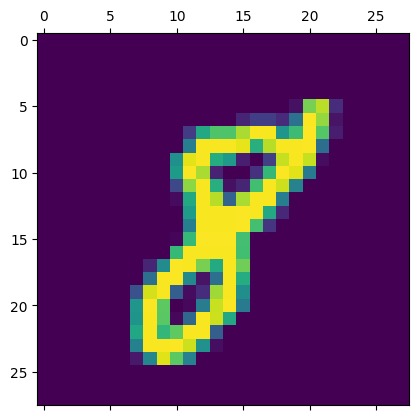

In [11]:
X = dfX.to_numpy()
Y = dfY.to_numpy().reshape(3000,)
Xt = dfXt.to_numpy()
Yt = dfYt.to_numpy().reshape(1500,)

a= 2000
plt.matshow(X[a,:].reshape((28,28)))
Y[a]


In [12]:
X.shape


(3000, 784)

In [13]:
np.unique(Y)
print((Y==1).mean())
print((Y==7).mean())
print((Y==8).mean())


0.3333333333333333
0.3333333333333333
0.3333333333333333


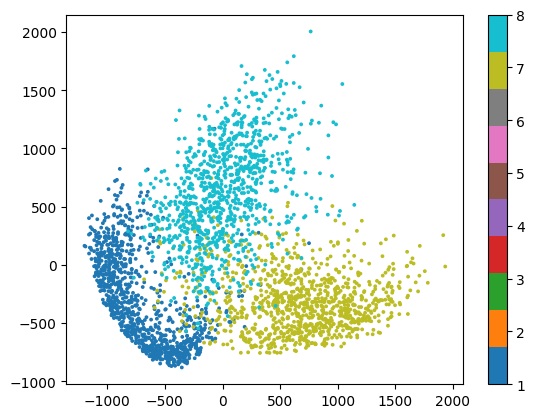

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
F = pca.transform(X)

plt.scatter(F[:,0], F[:,1], c=Y, cmap=plt.get_cmap("tab10"), s=3)
plt.colorbar()


# On trace les individus dans les 2 premiers plans factoriels pour visualiser le nuage
# dans un repère qui conserve le plus d'information, pour exemple dans un autre plan factoriel
# le nuage des individus est beaucoup moins interprétable: on ne voit rien.


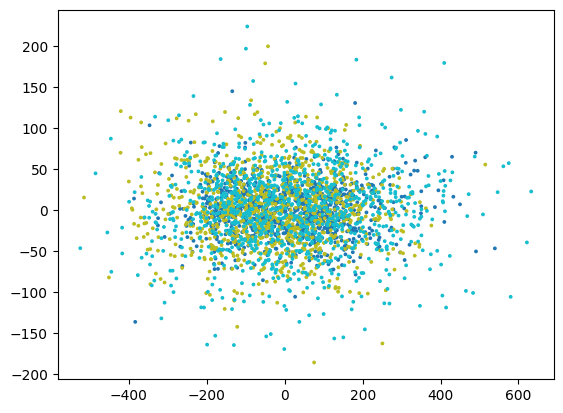

In [15]:
plt.scatter(F[:,20], F[:,113], c=Y, cmap=plt.get_cmap("tab10"), s=3)


# Dans le premier graphe on remarque que les 3 classes sont relativement bien séparées,
# on en déduit q'une méthode de classification (même simple) devrait permettre de séparer
# facilement les 3 classes, on s'attend à des erreurs de classification faibles comme on l'observe
# ci dessous.
# 
# On reviendra vers ce graphe pour interpréter la matrice de confusion: 
# Les erreurs les plus importantes devraient avoir lieu pour des classes dont la frontière
# est peu nette.


In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import confusion_matrix


lda = LinearDiscriminantAnalysis()
lda.fit(X,Y)


LinearDiscriminantAnalysis()

In [17]:
Predlin = lda.predict(X)# in sample
(Predlin != Y).mean()

Predlin = lda.predict(Xt)# out of sample
(Predlin !=Yt).mean()


0.06666666666666667

In [18]:
# Matrice confusion:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix( Yt, Predlin), index =['V1', 'V7', 'V8'], columns = ['P1', 'P7', 'P8'])


,P1,P7,P8
V1,488,2,10
V7,32,457,11
V8,33,12,455


# On remarque que l'erreur la plus importante (en mouyenne) est que l'algorithme prédit 1
# alors qu'il s'agit d'un 7 ou d'un 8 (première colonne). La classe des 1 est la mieux 
# retrouvée (1 ligne; un vrai 1 est plus rarement classé comme 7 ou 8).


In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()

qda.fit(X,Y)


c:\Users\valen\anaconda3\envs\py38\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [20]:
# Errors
Predqda = qda.predict(X)# in sample
print((Predqda != Y).mean())

Predqda = qda.predict(Xt)# out of sample
print((Predqda != Yt).mean())


0.017666666666666667
0.07666666666666666


In [21]:
# Matrice confusion:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(Yt, Predqda), index =['V1', 'V7', 'V8'], columns = ['P1', 'P7', 'P8'])
# Résultats identiques à la méthode linéaire.


,P1,P7,P8
V1,465,0,35
V7,2,450,48
V8,15,15,470
